In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
policeFile = pd.read_csv('policeData.csv')
policeFile.head(5)

incidentNeighborhood = policeFile["INCIDENTNEIGHBORHOOD"]
incidentNeighborhood.head(5)

0                    North Shore
1            Upper Lawrenceville
2              Northview Heights
3    Golden Triangle/Civic Arena
4              Northview Heights
Name: INCIDENTNEIGHBORHOOD, dtype: object

In [3]:
myNeighborhoodDictPoliceData = {}
incidentNeighborhood = incidentNeighborhood.fillna("Unknown Neighborhood")
for neighborhoods in incidentNeighborhood:
    if neighborhoods in myNeighborhoodDictPoliceData:
        myNeighborhoodDictPoliceData[neighborhoods] += 1
    else:
        myNeighborhoodDictPoliceData[neighborhoods] = 1

for key, value in myNeighborhoodDictPoliceData.items():
    print(key, ":", value)

North Shore : 3728
Upper Lawrenceville : 1670
Northview Heights : 2663
Golden Triangle/Civic Arena : 4278
South Side Flats : 19098
Elliott : 2675
Homewood North : 6597
South Side Slopes : 4323
Carrick : 11927
South Oakland : 2442
Unknown Neighborhood : 6922
Bloomfield : 8704
Beechview : 5764
Bluff : 4838
Strip District : 3530
Mount Washington : 7723
East Carnegie : 401
Crafton Heights : 2901
Marshall-Shadeland : 5693
East Liberty : 8451
East Allegheny : 6021
Friendship : 1650
Arlington : 2166
Central Northside : 786
Spring Hill-City View : 2480
Brighton Heights : 6305
Westwood : 1650
East Hills : 5056
Brookline : 7792
South Shore : 1272
Lower Lawrenceville : 2604
Bedford Dwellings : 2675
Troy Hill-Herrs Island : 252
Central Oakland : 5229
Garfield : 3532
West End : 1290
West Oakland : 2014
Central Lawrenceville : 4385
Lincoln-Lemington-Belmar : 6865
Sheraden : 6214
Beltzhoover : 2093
Outside City : 2258
Squirrel Hill South : 7809
North Oakland : 4762
Allentown : 5273
Perry North : 3177

Text(0.5, 1.0, 'BarPlot')

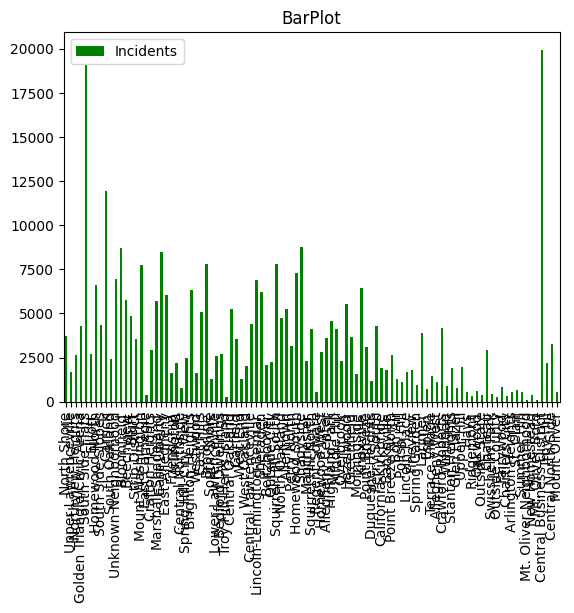

In [7]:
df = pd.DataFrame.from_dict(myNeighborhoodDictPoliceData, orient='index')
df.columns = ["Incidents"]
df.plot(kind='bar',
        y='Incidents',
        color='green')
 
# set the title
plt.title('BarPlot')

In [ ]:
greenlandData = pd.read_csv('greenlandData.csv')
greenlandData = greenlandData.fillna(0)
greenlandData.head(5)

,Responsibility_Parks or Operations,Facility,Division,Total Acreage,Maintainable Acreage,Shelter,Rec Center,Senior Center,Pool,Spray Pool,...,Grandstand,Control Link for Basketball Courts,Control Link for Tennis Court,Control Linkl for Hockey Court,Dek Hockey Court,Dog Park,Spray Park,Ownership of Facility,Benches,Tables
0,Operations,Bates St Triangle,3.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
1,Operations,Baum Negley Triangle,2.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
2,Operations,Bedford Strip,3.0,0.3,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0
3,Operations,Beechview Monument,5.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,No,No,No,0.0,0.0,0.0,0.0,2.0,0.0
4,Operations,Brookline Monument,4.0,0.1,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,No,No,No,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
myNeighborhoodDictGreenlandData = {}
for rowNum in range(0,greenlandData.shape[0]):
    neighborhood = greenlandData.iloc[rowNum,27]
    totalAcreage = float(greenlandData.iloc[rowNum,3])
    if neighborhood == 0:
        pass
    elif neighborhood in myNeighborhoodDictGreenlandData:
        myNeighborhoodDictGreenlandData[neighborhood] += totalAcreage
    else:
        myNeighborhoodDictGreenlandData[neighborhood] = totalAcreage

for key, value in myNeighborhoodDictGreenlandData.items():
    print(key, ":", value)

South Oakland : 0.30000000000000004
East Liberty : 4.1499999999999995
Crawford Roberts : 0.3
Beechview : 0.1
Brookline : 0.1
Central Business District : 1.24
Point Breeze : 1.1199999999999999
North Oakland : 0.1
Point Breeze North : 1.4
Squirrel Hill South : 0.4
Central Oakland : 1.7000000000000002
Polish Hill : 0.01
Regent Square : 0.01
Sheraden : 0.1
Swisshelm Park : 0.05


In [ ]:
for neighborhood in myNeighborhoodDictGreenlandData:
    if neighborhood in myNeighborhoodDictPoliceData:
        print(f"This neighborhood is in both of them: {neighborhood}")

myNeighborhoodDictGreenlandData["Crawford-Roberts"] = myNeighborhoodDictGreenlandData[neighborhood]
del myNeighborhoodDictGreenlandData['Crawford Roberts']

This neighborhood is in both of them: South Oakland
This neighborhood is in both of them: East Liberty
This neighborhood is in both of them: Beechview
This neighborhood is in both of them: Brookline
This neighborhood is in both of them: Central Business District
This neighborhood is in both of them: Point Breeze
This neighborhood is in both of them: North Oakland
This neighborhood is in both of them: Point Breeze North
This neighborhood is in both of them: Squirrel Hill South
This neighborhood is in both of them: Central Oakland
This neighborhood is in both of them: Polish Hill
This neighborhood is in both of them: Regent Square
This neighborhood is in both of them: Sheraden
This neighborhood is in both of them: Swisshelm Park


In [ ]:
for neighborhood in myNeighborhoodDictGreenlandData:
    if neighborhood in myNeighborhoodDictPoliceData:
        print(f"This neighborhood is in both of them: {neighborhood}")
    else:
        print(f"This neighborhood is NOT in both of them: {neighborhood}")

This neighborhood is in both of them: South Oakland
This neighborhood is in both of them: East Liberty
This neighborhood is in both of them: Beechview
This neighborhood is in both of them: Brookline
This neighborhood is in both of them: Central Business District
This neighborhood is in both of them: Point Breeze
This neighborhood is in both of them: North Oakland
This neighborhood is in both of them: Point Breeze North
This neighborhood is in both of them: Squirrel Hill South
This neighborhood is in both of them: Central Oakland
This neighborhood is in both of them: Polish Hill
This neighborhood is in both of them: Regent Square
This neighborhood is in both of them: Sheraden
This neighborhood is in both of them: Swisshelm Park
This neighborhood is in both of them: Crawford-Roberts


In [ ]:
crimeMax = max(myNeighborhoodDictPoliceData.values())
greenlandMax = max(myNeighborhoodDictGreenlandData.values())

print(f"Here is the max for the crime incident data: {crimeMax} and here is the max for greenland data: {greenlandMax}")


Here is the max for the crime incident data: 19943 and here is the max for greenland data: 4.1499999999999995


In [ ]:
for keys in myNeighborhoodDictPoliceData:
    myNeighborhoodDictPoliceData[keys] = (1 - (myNeighborhoodDictPoliceData[keys]/crimeMax))

for keys in myNeighborhoodDictGreenlandData:
    myNeighborhoodDictGreenlandData[keys] = myNeighborhoodDictGreenlandData[keys]/greenlandMax

for key, value in myNeighborhoodDictPoliceData.items():
    print(key, ":", value)

for key, value in myNeighborhoodDictGreenlandData.items():
    print(key, ":", value)

North Shore : 0.8130672416386702
Upper Lawrenceville : 0.9162613448327734
Northview Heights : 0.8664694378980093
Golden Triangle/Civic Arena : 0.7854886426314998
South Side Flats : 0.04237075665647094
Elliott : 0.8658677230105801
Homewood North : 0.669207240635812
South Side Slopes : 0.7832322118036403
Carrick : 0.4019455448026876
South Oakland : 0.8775510204081632
Unknown Neighborhood : 0.6529107957679386
Bloomfield : 0.5635561349847065
Beechview : 0.7109762824048538
Bluff : 0.7574086145514717
Strip District : 0.8229955372812516
Mount Washington : 0.6127463270320412
East Carnegie : 0.9798926941784085
Crafton Heights : 0.8545354259639975
Marshall-Shadeland : 0.7145364288221432
East Liberty : 0.5762422905280048
East Allegheny : 0.6980895552324125
Friendship : 0.9172642029784887
Arlington : 0.8913904628190342
Central Northside : 0.9605876748733891
Spring Hill-City View : 0.8756455899313043
Brighton Heights : 0.6838489695632552
Westwood : 0.9172642029784887
East Hills : 0.746477460763175


In [ ]:
for neighborhoods in myNeighborhoodDictPoliceData:
    if neighborhoods in myNeighborhoodDictGreenlandData:
        pass
    else:
        myNeighborhoodDictGreenlandData[neighborhoods] = 0


for key, value in myNeighborhoodDictGreenlandData.items():
    print(key, ":", value)

South Oakland : 0.07228915662650605
East Liberty : 1.0
Beechview : 0.02409638554216868
Brookline : 0.02409638554216868
Central Business District : 0.29879518072289163
Point Breeze : 0.26987951807228916
North Oakland : 0.02409638554216868
Point Breeze North : 0.3373493975903615
Squirrel Hill South : 0.09638554216867472
Central Oakland : 0.40963855421686757
Polish Hill : 0.0024096385542168677
Regent Square : 0.0024096385542168677
Sheraden : 0.02409638554216868
Swisshelm Park : 0.01204819277108434
Crawford-Roberts : 0.01204819277108434
North Shore : 0
Upper Lawrenceville : 0
Northview Heights : 0
Golden Triangle/Civic Arena : 0
South Side Flats : 0
Elliott : 0
Homewood North : 0
South Side Slopes : 0
Carrick : 0
Unknown Neighborhood : 0
Bloomfield : 0
Bluff : 0
Strip District : 0
Mount Washington : 0
East Carnegie : 0
Crafton Heights : 0
Marshall-Shadeland : 0
East Allegheny : 0
Friendship : 0
Arlington : 0
Central Northside : 0
Spring Hill-City View : 0
Brighton Heights : 0
Westwood : 0


In [ ]:
myNeighborhoodDict = {}

for keys in myNeighborhoodDictGreenlandData:
    myNeighborhoodDict[keys] = (myNeighborhoodDictGreenlandData[keys] + myNeighborhoodDictPoliceData[keys])

del myNeighborhoodDict["Unknown Neighborhood"]

for key, value in myNeighborhoodDict.items():
    print(key, ":", value)

South Oakland : 0.9498401770346693
East Liberty : 1.576242290528005
Beechview : 0.7350726679470224
Brookline : 0.6333828519714922
Central Business District : 0.29879518072289163
Point Breeze : 1.1157903639831352
North Oakland : 0.7853158610473584
Point Breeze North : 1.2048718365413718
Squirrel Hill South : 0.7048195791741402
Central Oakland : 1.1474412920196055
Polish Hill : 0.9475532979835906
Regent Square : 0.97407889593776
Sheraden : 0.7125083596684284
Swisshelm Park : 0.9898348848434907
Crawford-Roberts : 0.8015984108927311
North Shore : 0.8130672416386702
Upper Lawrenceville : 0.9162613448327734
Northview Heights : 0.8664694378980093
Golden Triangle/Civic Arena : 0.7854886426314998
South Side Flats : 0.04237075665647094
Elliott : 0.8658677230105801
Homewood North : 0.669207240635812
South Side Slopes : 0.7832322118036403
Carrick : 0.4019455448026876
Bloomfield : 0.5635561349847065
Bluff : 0.7574086145514717
Strip District : 0.8229955372812516
Mount Washington : 0.6127463270320412

In [ ]:
sortedDict = dict(sorted(myNeighborhoodDict.items(), key=lambda item: item[1]))

for key in sortedDict:
    print(key, ":", myNeighborhoodDict[key])

South Side Flats : 0.04237075665647094
Central Business District : 0.29879518072289163
Carrick : 0.4019455448026876
Shadyside : 0.5600962743819886
Bloomfield : 0.5635561349847065
Mount Washington : 0.6127463270320412
Brookline : 0.6333828519714922
Homewood South : 0.634107205535777
Lincoln-Lemington-Belmar : 0.6557689414832272
Homewood North : 0.669207240635812
Knoxville : 0.677330391616106
Brighton Heights : 0.6838489695632552
East Allegheny : 0.6980895552324125
Squirrel Hill South : 0.7048195791741402
Sheraden : 0.7125083596684284
Marshall-Shadeland : 0.7145364288221432
Hazelwood : 0.7220578649150078
Beechview : 0.7350726679470224
Allentown : 0.7355964498821641
East Hills : 0.746477460763175
Bluff : 0.7574086145514717
Highland Park : 0.7712480569623427
Central Lawrenceville : 0.780123351551923
South Side Slopes : 0.7832322118036403
Perry South : 0.783733640876498
North Oakland : 0.7853158610473584
Golden Triangle/Civic Arena : 0.7854886426314998
Middle Hill : 0.7931605074462218
Squir